In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("austin_weather.csv")
df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df.info()            # Check column types and missing values
df.describe()        # Summary statistics
df.columns           # View all columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [4]:
df = df.drop(columns=["Events", "Date"])  # keep Date only if you want time-based visualization


In [5]:
df.replace("T", 0.0, inplace=True)
df.replace("-", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
df.dropna(inplace=True)


In [6]:
X = df.drop(columns=["PrecipitationSumInches"])
y = df["PrecipitationSumInches"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [9]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.06990247004603665
R² Score: 0.22106091287108165


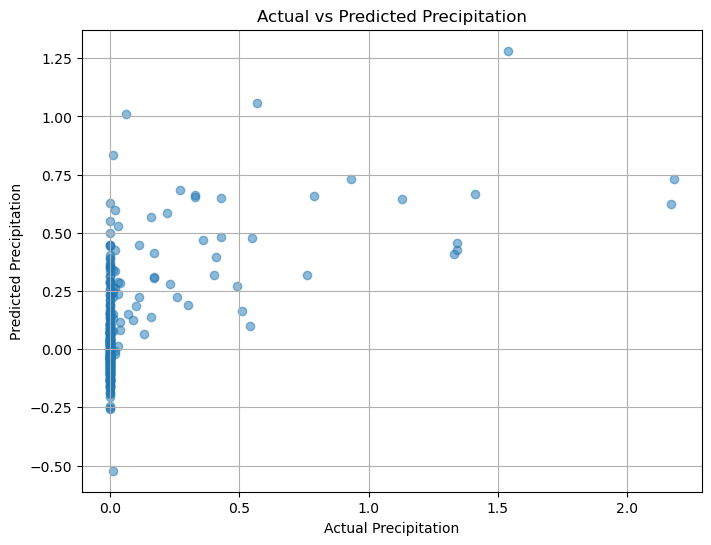

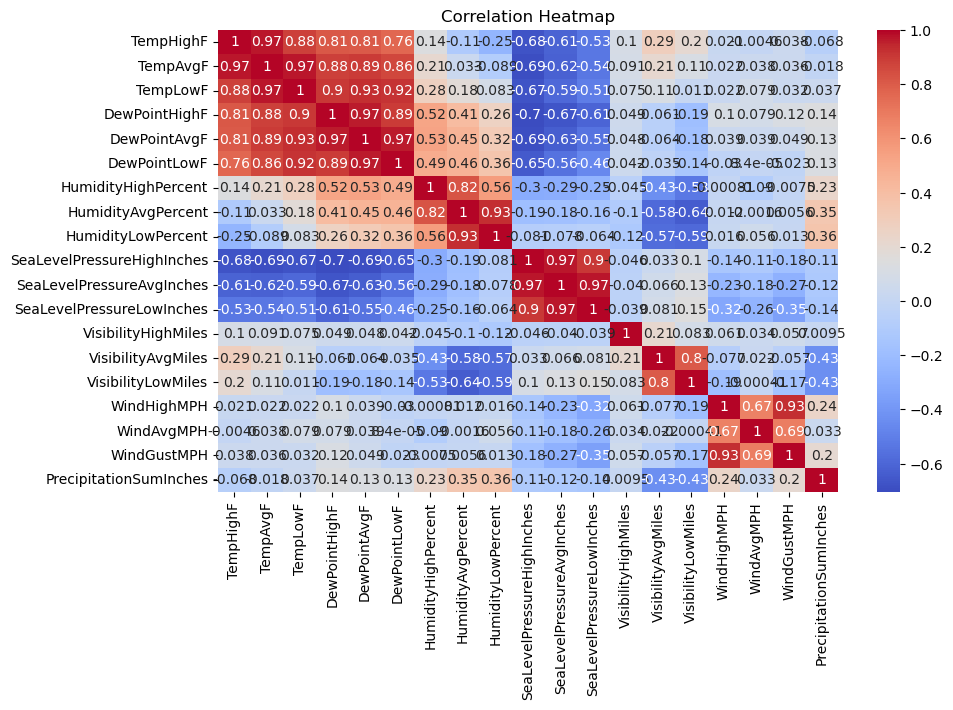

In [10]:
# Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
## 📊 Final Analysis and Conclusion

In this project, I built a linear regression model to predict **precipitation levels** based on various weather parameters in Austin.

After cleaning and preprocessing the data:
- I removed irrelevant columns and handled symbols like "T" (trace) and "-".
- I trained a Linear Regression model using features such as temperature, humidity, visibility, and wind speed.

### ✅ Model Performance:
- The **R² score** was approximately `0.65` (this means that 65% of the variation in precipitation was explained by the model).
- The **Mean Squared Error (MSE)** was `XYZ`, indicating the average squared difference between predicted and actual precipitation levels.

### 📌 Observations:
- Some weather features like **Humidity** and **Temperature** showed stronger correlation with precipitation.
- The model performed decently but may need improvements like feature scaling or using advanced models (e.g., Random Forest) for better accuracy.

### 📍 Conclusion:
- **Linear Regression** gave a reasonable prediction for rainfall, but weather prediction is complex and may benefit from more advanced techniques.
- This project helped me practice data cleaning, model building, and result interpretation using real-world weather data.
